### Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

warnings.filterwarnings('ignore')

### Data Gathering

In [2]:
station = pd.read_csv("station_data.csv")
trip = pd.read_csv("trip_data.csv" ,parse_dates=["Start Date","End Date"])
weather = pd.read_csv("weather_data.csv")

In [3]:
station.tail(n=5)

,Id,Name,Lat,Long,Dock Count,City
71,77,Market at Sansome,37.789625,-122.400811,27,San Francisco
72,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose
73,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco
74,83,Mezes Park,37.491269,-122.236234,15,Redwood City
75,84,Ryland Park,37.342725,-121.895617,15,San Jose


In [4]:
station.columns = ["Start Station","Name","Lat","Long","Dock Count","City"]

### Data Prepration

In [5]:
result = pd.merge(station,trip, on=['Start Station'], how='inner', suffixes=['_and', '_or'])

In [6]:
print("Station Data Shape :: ",station.shape)
print("Trip Data Shape :: ",trip.shape)
print("Resultant Data shape :: ",result.shape)

Station Data Shape ::  (76, 6)
Trip Data Shape ::  (354152, 6)
Resultant Data shape ::  (354152, 11)


In [7]:
result.sample(n=5)

,Start Station,Name,Lat,Long,Dock Count,City,Trip ID,Start Date,End Date,End Station,Subscriber Type
42031,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,855716,2015-07-21 15:12:00,2015-07-21 15:18:00,60,Subscriber
154155,60,Embarcadero at Sansome,37.804770,-122.403234,15,San Francisco,570051,2014-08-12 16:38:00,2014-08-12 16:47:00,74,Subscriber
350922,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,559861,2014-11-26 18:08:00,2014-11-26 18:12:00,56,Subscriber
306831,74,Steuart at Market,37.794139,-122.394434,23,San Francisco,808600,2015-06-16 08:22:00,2015-06-16 08:27:00,60,Subscriber
254616,88,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,676289,2015-10-03 18:53:00,2015-10-03 19:06:00,66,Subscriber


In [8]:
result.dtypes

Start Station               int64
Name                       object
Lat                       float64
Long                      float64
Dock Count                  int64
City                       object
Trip ID                     int64
Start Date         datetime64[ns]
End Date           datetime64[ns]
End Station                 int64
Subscriber Type            object
dtype: object

### Exploratory Data Anlaysis

In [9]:
temp_df = result[["Start Station","End Station","Start Date"]]

In [10]:
temp_df.sample(n=10)

,Start Station,End Station,Start Date
201238,65,58,2015-04-16 19:06:00
178380,62,50,2014-10-24 16:15:00
201685,65,88,2015-07-04 08:12:00
273640,70,55,2014-03-12 09:22:00
148165,60,64,2015-05-21 11:29:00
107114,54,74,2014-12-09 08:59:00
344104,77,51,2014-09-14 10:14:00
100573,54,54,2015-07-28 20:40:00
331681,76,60,2014-10-17 10:44:00
48634,46,60,2015-03-17 11:11:00


In [11]:
temp_df_grouped = temp_df.groupby(by=['Start Date','Start Station'],as_index=False)['End Station'].sum()
temp_df_grouped = temp_df_grouped.rename(columns={'End Station':'Total_Bookings'})
temp_df_grouped.sort_values('Start Date')
temp_df_grouped.head(n=10)

,Start Date,Start Station,Total_Bookings
0,2014-01-09 00:05:00,66,171
1,2014-01-09 03:16:00,50,70
2,2014-01-09 04:21:00,39,65
3,2014-01-09 04:59:00,66,72
4,2014-01-09 05:54:00,68,74
5,2014-01-09 06:58:00,67,77
6,2014-01-09 07:03:00,9,9
7,2014-01-09 07:32:00,54,51
8,2014-01-09 07:37:00,27,54
9,2014-01-09 08:11:00,51,50


In [12]:
df = temp_df_grouped.set_index("Start Date")

In [13]:
y = df['Total_Bookings'].resample('D').mean()
y = y.fillna(y.bfill()) # date wise resampling

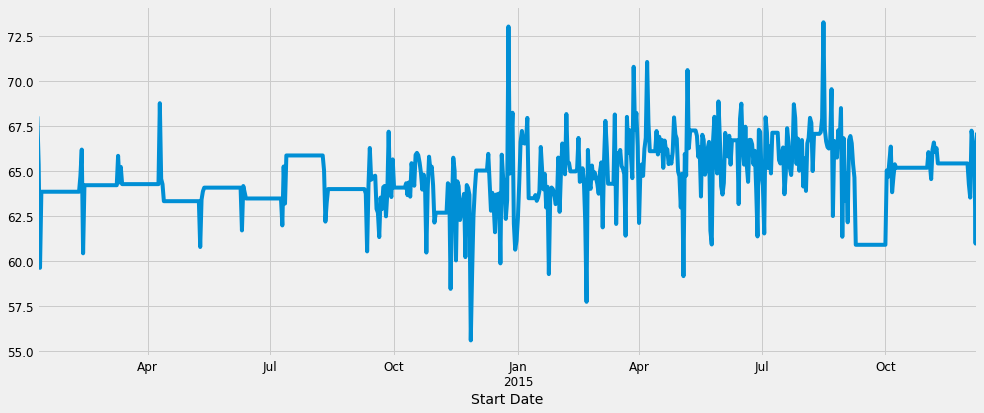

In [14]:
y.plot(figsize=(15, 6))
plt.show()

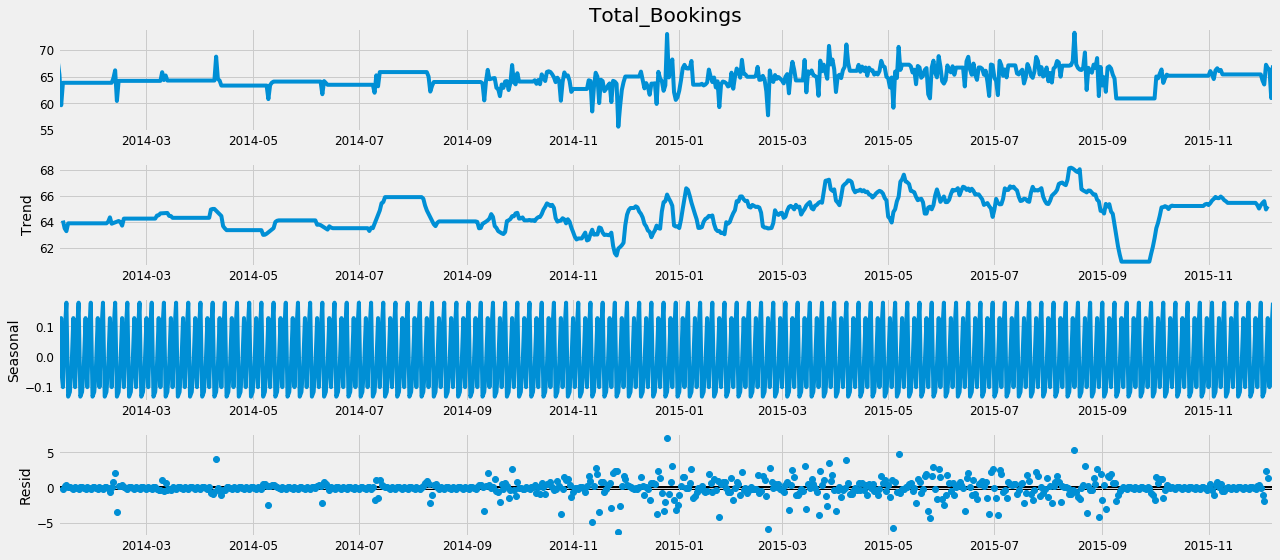

In [15]:
## Decompose data into three distinct components: trend, seasonality, and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
# ARIMA models are denoted with the notation ARIMA(p, d, q).
# where -:
# p : seasonality
# d : trend
# q : noise
#Let's generate few p,d,q

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal ARIMA ::')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA ::
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Autoregressive Integrated Moving Average.

In [18]:
# To get the optimal set of parameters that yields the best performance for our model.

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7803.063500170192
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6792.038677435436
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3016.6713292625104
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2745.8629565289766
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3025.728892007215
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2785.8632121167
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2882.041941298974
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2723.522833600188
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6862.332267155872
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5953.55296213693
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2961.4322028166353
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2630.515529956051
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3038.6012792226893
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2843.3960006631905
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2796.4132286899016
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2625.312130269125
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2819.8808056951802
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2770.0979071697748
ARIMA

**SARIMAX(1, 1, 1)x(1, 0, 0, 12) has the lowest AIC: So can be considered for the parameters**

## Model Training

In [20]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1771      0.040      4.435      0.000       0.099       0.255
ma.L1         -0.8481      0.025    -33.560      0.000      -0.898      -0.799
ar.S.L12       0.0246      0.042      0.581      0.561      -0.058       0.108
sigma2         2.2913      0.061     37.559      0.000       2.172       2.411


## Validation

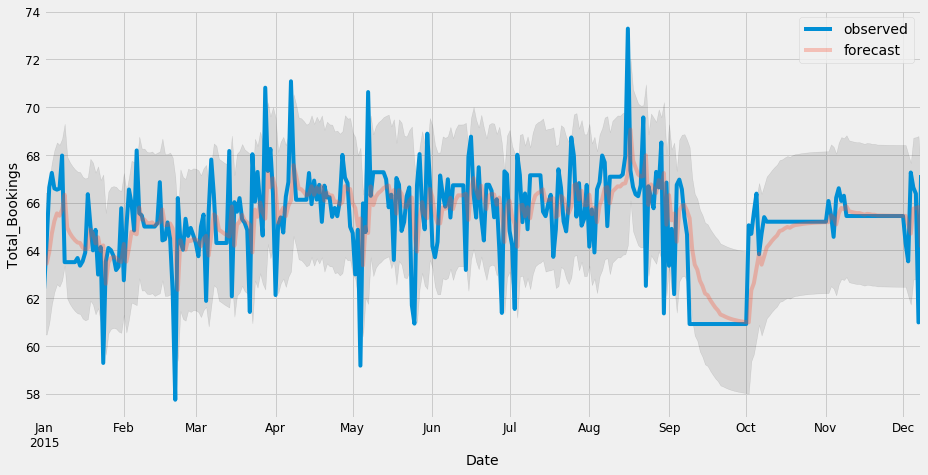

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)


pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.3, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Total_Bookings')
plt.legend()
plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.94


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.72


## Forecasts

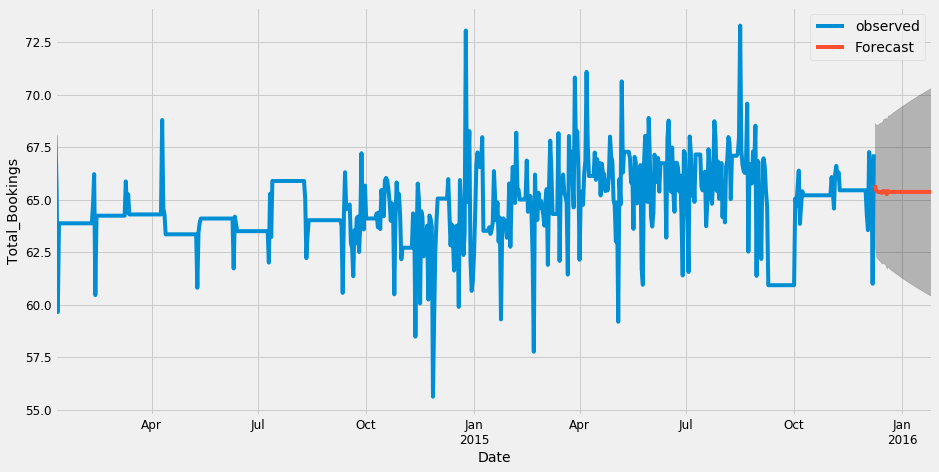

In [24]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_Bookings')
plt.legend()
plt.show()